Numerically step forward a simple diffusion equation of form

$$ \frac{\partial \phi}{\partial t} = \frac{\partial}{\partial x} \kappa \frac{\partial \phi}{\partial x}$$

where $\kappa$ is a diffusion coefficient and $\phi$ is the concentration of some property.

Equation is advanced using simple, conditionally stable, Euler forward scheme and a second order spatial discretization

$$\phi^{n+1} = \phi^{n} + \Delta t \delta_{x} ( \kappa \delta_{x}( \phi^{n})) $$

where $\Delta t$ is a discrete time step and $\delta_{x}(\cdot)$ is a spatial differencing operator.

$\delta_{x}(\phi)$ is defined as $\frac{\phi_{i+1}-\phi_{i}}{\Delta x}$, where $\Delta x$ is a grid spacing and $i$ and $i+1$
are indices of elements holding numerical values on the discrete grid.

In this example the domain is periodic, so no boundary conditions are needed.

In [1]:
# Load ppackages we use
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
from IPython.display import Video
from celluloid import Camera
from IPython.display import HTML

In [20]:
# Set up model problem
# Lx - domain size, nx - number of discrete points,
# dx - grid spacing, hw - halo width for periodicity
# dt - time step
Lx=1.
nx=101 
dx=Lx/nx
hw=1
dt=5

phi_arr=np.zeros(nx+hw*2)
kappa_arr=np.zeros(nx+hw*2)
phi_init=np.zeros(nx+hw*2)
phi_x=np.zeros(nx+hw*2)
phi_xx=np.zeros(nx+hw*2)
xc=np.zeros(nx+hw*2)
interior_pts=[*range(hw,nx+hw)]
kappa_arr=kappa_arr+dx**2/dt*0.5
rdx=1./dx

In [21]:
# Function for applying periodicity
def halo(fld,ipts,npts,hw):
    fld[0:hw]=fld[ipts][-hw:]
    fld[npts+hw:]=fld[ipts][0:hw]

In [30]:
# Define x locations of element centers
xc[interior_pts]=(np.linspace(1,nx,nx)-0.5)*dx
halo(xc,interior_pts,nx,hw)

Initial condition is a gaussian

$$ \phi(x) = e^{-50\left(\frac{x-x_{c}}{L_{x}}\right)^2} $$

where $L_{x}$ is domain length and $x_{c}=\frac{1}{2} L_{x}$.

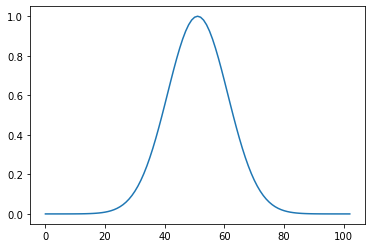

In [23]:
# Define an initial condition for the variable phi
phi_init[interior_pts]=np.exp( -50*(xc[interior_pts]/Lx-1/2)**2 )
halo(phi_init,interior_pts,nx,hw)
plt.plot(phi_init)

In [24]:
# Step forward the equation in time, evaluating the first and second 
# derivative approximations at each time step.
#
# Record plots for animation
phi_arr=phi_init

fig = plt.figure(figsize=(12,12))
camera=Camera(fig)
phi_arr=phi_init

for i in [*range(1,500)]:
 # First derivative in x
 phi_x[0:-1]=(phi_arr[1:]-phi_arr[0:-1])*rdx
 # Diffusive flux divergence in x
 phi_xx[interior_pts]=kappa_arr[interior_pts]*(phi_x[1:-1]-phi_x[0:-2])*rdx
 # Apply periodicity
 halo(phi_xx,interior_pts,nx,hw)
 # Update in time
 phi_arr=phi_arr+phi_xx*dt
 plt.plot(phi_init,'.')
 plt.plot(phi_arr)
 camera.snap()
    
animation=camera.animate()
plt.close()
animation.save('diffu_animation.mp4',fps=40)
Video("diffu_animation.mp4")